In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.models import load_model
from keras import regularizers
from keras.regularizers import L2

C:\Users\Acer\AppData\Local\Temp\ipykernel_28340\172370868.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [14]:
base_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Datanya/Panasonic 18650PF Data/25degC/Drive cycles/'
output_folder = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Data Training/25 C'

training_datasets_paths = [
    '03-18-17_02.17 25degC_Cycle_1_Pan18650PF.csv',
    '03-19-17_03.25 25degC_Cycle_2_Pan18650PF.csv',
    '03-19-17_09.07 25degC_Cycle_3_Pan18650PF.csv',
    '03-19-17_14.31 25degC_Cycle_4_Pan18650PF.csv',
]

from IPython.display import display

# Load the preprocessed training datasets
dfs_training_loaded = []
for dataset_path in training_datasets_paths:
    df_loaded = pd.read_csv(base_path + dataset_path)
    dfs_training_loaded.append(df_loaded)

# Display the first few rows of each loaded training dataset
for i, df_loaded in enumerate(dfs_training_loaded):
    print(f"Training Dataset {i+1}:\n")
    display(df_loaded.head())
    print("\n")

Training Dataset 1:



,TimeStamp,Voltage,Current,Ah,Wh,Power,Battery_Temp_degC,Time,Chamber_Temp_degC
0,3/18/2017 2:17:35 AM,4.14585,-1.81290,-0.00000,-0.00000,-7.516011,21.781981,0.000000,23
1,3/18/2017 2:17:35 AM,4.10532,-1.83249,-0.00005,-0.00020,-7.522958,21.781981,0.095996,23
2,3/18/2017 2:17:35 AM,4.08666,-1.85046,-0.00010,-0.00042,-7.562201,21.781981,0.202001,23
3,3/18/2017 2:17:35 AM,4.08087,-1.85781,-0.00015,-0.00062,-7.581481,21.781981,0.297997,23
4,3/18/2017 2:17:35 AM,4.07765,-1.86353,-0.00021,-0.00084,-7.598823,21.781981,0.403005,23




Training Dataset 2:



,TimeStamp,Voltage,Current,Ah,Wh,Power,Battery_Temp_degC,Time,Chamber_Temp_degC
0,3/19/2017 3:25:10 AM,4.17030,-2.63768,-0.00008,-0.00033,-10.999917,25.6307,0.000000,25
1,3/19/2017 3:25:10 AM,4.10660,-2.69730,-0.00015,-0.00063,-11.076732,25.6307,0.099999,25
2,3/19/2017 3:25:10 AM,4.08473,-2.73486,-0.00022,-0.00092,-11.171165,25.6307,0.205994,25
3,3/19/2017 3:25:10 AM,4.07701,-2.75528,-0.00030,-0.00125,-11.233304,25.6307,0.309001,25
4,3/19/2017 3:25:10 AM,4.07379,-2.76344,-0.00038,-0.00157,-11.257674,25.6307,0.409996,25




Training Dataset 3:



,TimeStamp,Voltage,Current,Ah,Wh,Power,Battery_Temp_degC,Time,Chamber_Temp_degC
0,3/19/2017 9:07:28 AM,4.17351,-1.58016,-0.00004,-0.00018,-6.594814,25.44016,0.000000,25
1,3/19/2017 9:07:29 AM,4.13555,-1.59649,-0.00009,-0.00036,-6.602364,25.65312,0.104003,25
2,3/19/2017 9:07:29 AM,4.12462,-1.60629,-0.00013,-0.00054,-6.625336,25.65312,0.209997,25
3,3/19/2017 9:07:29 AM,4.12076,-1.61201,-0.00018,-0.00073,-6.642706,25.65312,0.304002,25
4,3/19/2017 9:07:29 AM,4.11883,-1.61527,-0.00022,-0.00091,-6.653023,25.64191,0.397996,25




Training Dataset 4:



,TimeStamp,Voltage,Current,Ah,Wh,Power,Battery_Temp_degC,Time,Chamber_Temp_degC
0,3/19/2017 2:31:06 PM,4.17351,-1.77533,0.00000,0.00000,-7.409358,25.61949,0.000000,25
1,3/19/2017 2:31:06 PM,4.13298,-1.75328,-0.00009,-0.00038,-7.246271,25.61949,0.101005,25
2,3/19/2017 2:31:06 PM,4.12011,-1.75573,-0.00014,-0.00058,-7.233801,25.61949,0.203006,25
3,3/19/2017 2:31:06 PM,4.11368,-1.76145,-0.00019,-0.00079,-7.246042,25.61949,0.304002,25
4,3/19/2017 2:31:06 PM,4.11175,-1.76308,-0.00019,-0.00079,-7.249344,25.61949,0.396005,25


In [2]:
def preprocess_dataset(dataset_path):
    df = pd.read_csv(dataset_path, usecols=['Voltage', 'Current', 'Battery_Temp_degC', 'Ah'], skiprows=0)
    df = df.rename(columns={'Battery_Temp_degC': 'Temperature'})
    scaler = MinMaxScaler()
    columns_to_normalize = ['Voltage', 'Current', 'Temperature', 'Ah']
    df_normalized = df.copy()
    df_normalized[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    df_normalized['SOC'] = (df_normalized['Ah'] / df_normalized['Ah'].max())
    
    # Menghilangkan data yang hilang (missing values)
    df_normalized = df_normalized.dropna()
    
    # Setel ulang indeks dengan benar
    df_normalized.reset_index(inplace=True)  # Kembalikan indeks ke kolom 'TimeStamp'
    
    # Sisipkan langkah waktu dengan benar
    df_normalized.insert(0, 'Step Time', range(1, len(df_normalized) + 1))
    
    return df_normalized


In [18]:
# Preprocess dataset training
dfs_training_preprocessed = []
for dataset_path in training_datasets_paths:
    df_preprocessed = preprocess_dataset(base_path + dataset_path)
    dfs_training_preprocessed.append(df_preprocessed)

for i, df_preprocessed in enumerate(dfs_training_preprocessed):
    print(f"Preprocessed Training Dataset {i+1}:\n")
    display(df_preprocessed.head())
    print("\n")

for i, df_preprocessed in enumerate(dfs_training_preprocessed):
    file_path = f'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Data Training/25 C/Training_{i+1}_25degC.csv'
    df_preprocessed.to_csv(file_path, index=False)
    print(f"Preprocessed Training Dataset {i+1} saved di: {file_path}")

Preprocessed Training Dataset 1:



,Step Time,index,Voltage,Current,Ah,Temperature,SOC
0,1,0,0.958266,0.584681,1.000000,0.001402,1.000000
1,2,1,0.934639,0.584031,0.999981,0.001402,0.999981
2,3,2,0.923761,0.583435,0.999963,0.001402,0.999963
3,4,3,0.920385,0.583191,0.999944,0.001402,0.999944
4,5,4,0.918508,0.583002,0.999922,0.001402,0.999922




Preprocessed Training Dataset 2:



,Step Time,index,Voltage,Current,Ah,Temperature,SOC
0,1,0,0.979090,0.554537,1.000000,0.002817,1.000000
1,2,1,0.941632,0.552413,0.999974,0.002817,0.999974
2,3,2,0.928772,0.551076,0.999948,0.002817,0.999948
3,4,3,0.924232,0.550349,0.999919,0.002817,0.999919
4,5,4,0.922339,0.550058,0.999889,0.002817,0.999889




Preprocessed Training Dataset 3:



,Step Time,index,Voltage,Current,Ah,Temperature,SOC
0,1,0,0.979090,0.585128,1.000000,0.002817,1.000000
1,2,1,0.956768,0.584518,0.999980,0.056340,0.999980
2,3,2,0.950341,0.584151,0.999964,0.056340,0.999964
3,4,3,0.948071,0.583938,0.999945,0.056340,0.999945
4,5,4,0.946936,0.583816,0.999929,0.053522,0.999929




Preprocessed Training Dataset 4:



,Step Time,index,Voltage,Current,Ah,Temperature,SOC
0,1,0,0.972831,0.576003,1.000000,0.053413,1.000000
1,2,1,0.949151,0.576793,0.999968,0.053413,0.999968
2,3,2,0.941631,0.576705,0.999950,0.053413,0.999950
3,4,3,0.937874,0.576500,0.999932,0.053413,0.999932
4,5,4,0.936747,0.576442,0.999932,0.053413,0.999932




Preprocessed Training Dataset 1 saved di: C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Data Training/25 C/Training_1_25degC.csv
Preprocessed Training Dataset 2 saved di: C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Data Training/25 C/Training_2_25degC.csv
Preprocessed Training Dataset 3 saved di: C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Data Training/25 C/Training_3_25degC.csv
Preprocessed Training Dataset 4 saved di: C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Data Training/25 C/Training_4_25degC.csv


In [3]:
testing_dataset_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Datanya/Panasonic 18650PF Data/25degC/Drive cycles/03-20-17_01.43 25degC_US06_Pan18650PF.csv'

# Proses data testing
df_testing_preprocessed = preprocess_dataset(testing_dataset_path)

# Simpan data testing yang telah diproses ke file CSV
output_testing_file_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Data Training/25 C/Testing_US06.csv'
df_testing_preprocessed.to_csv(output_testing_file_path, index=False)

# Tampilkan beberapa baris pertama dari DataFrame data testing yang telah diproses
print("Preprocessed Testing Dataset:\n")
display(df_testing_preprocessed.head())

Preprocessed Testing Dataset:



,Step Time,index,Voltage,Current,Ah,Temperature,SOC
0,1,0,0.974221,0.732885,1.000000,0.001522,1.000000
1,2,1,0.973474,0.731505,1.000000,0.001522,1.000000
2,3,2,0.973104,0.730930,1.000000,0.001522,1.000000
3,4,3,0.973104,0.730815,1.000000,0.001522,1.000000
4,5,4,0.972728,0.730757,0.999996,0.001522,0.999996


In [20]:
# Gabungkan dataset pelatihan yang telah diproses sebelumnya
combined_training_data = pd.concat([dfs_training_preprocessed[0][['Step Time', 'Voltage', 'Current', 'Temperature', 'SOC']],
                                    dfs_training_preprocessed[1][['Step Time', 'Voltage', 'Current', 'Temperature', 'SOC']],
                                    dfs_training_preprocessed[2][['Step Time', 'Voltage', 'Current', 'Temperature', 'SOC']],
                                    dfs_training_preprocessed[3][['Step Time', 'Voltage', 'Current', 'Temperature', 'SOC']]], 
                                   ignore_index=True)

# Simpan DataFrame gabungan ke file CSV
output_file_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Data Training/25 C/Gabungan_Training_Data_25 C_Panasonic.csv'
combined_training_data.to_csv(output_file_path, index=False)

# Tampilkan beberapa baris pertama dari DataFrame gabungan
print("Combined Training Dataset:\n")
display(combined_training_data.head())

Combined Training Dataset:



,Step Time,Voltage,Current,Temperature,SOC
0,1,0.958266,0.584681,0.001402,1.000000
1,2,0.934639,0.584031,0.001402,0.999981
2,3,0.923761,0.583435,0.001402,0.999963
3,4,0.920385,0.583191,0.001402,0.999944
4,5,0.918508,0.583002,0.001402,0.999922


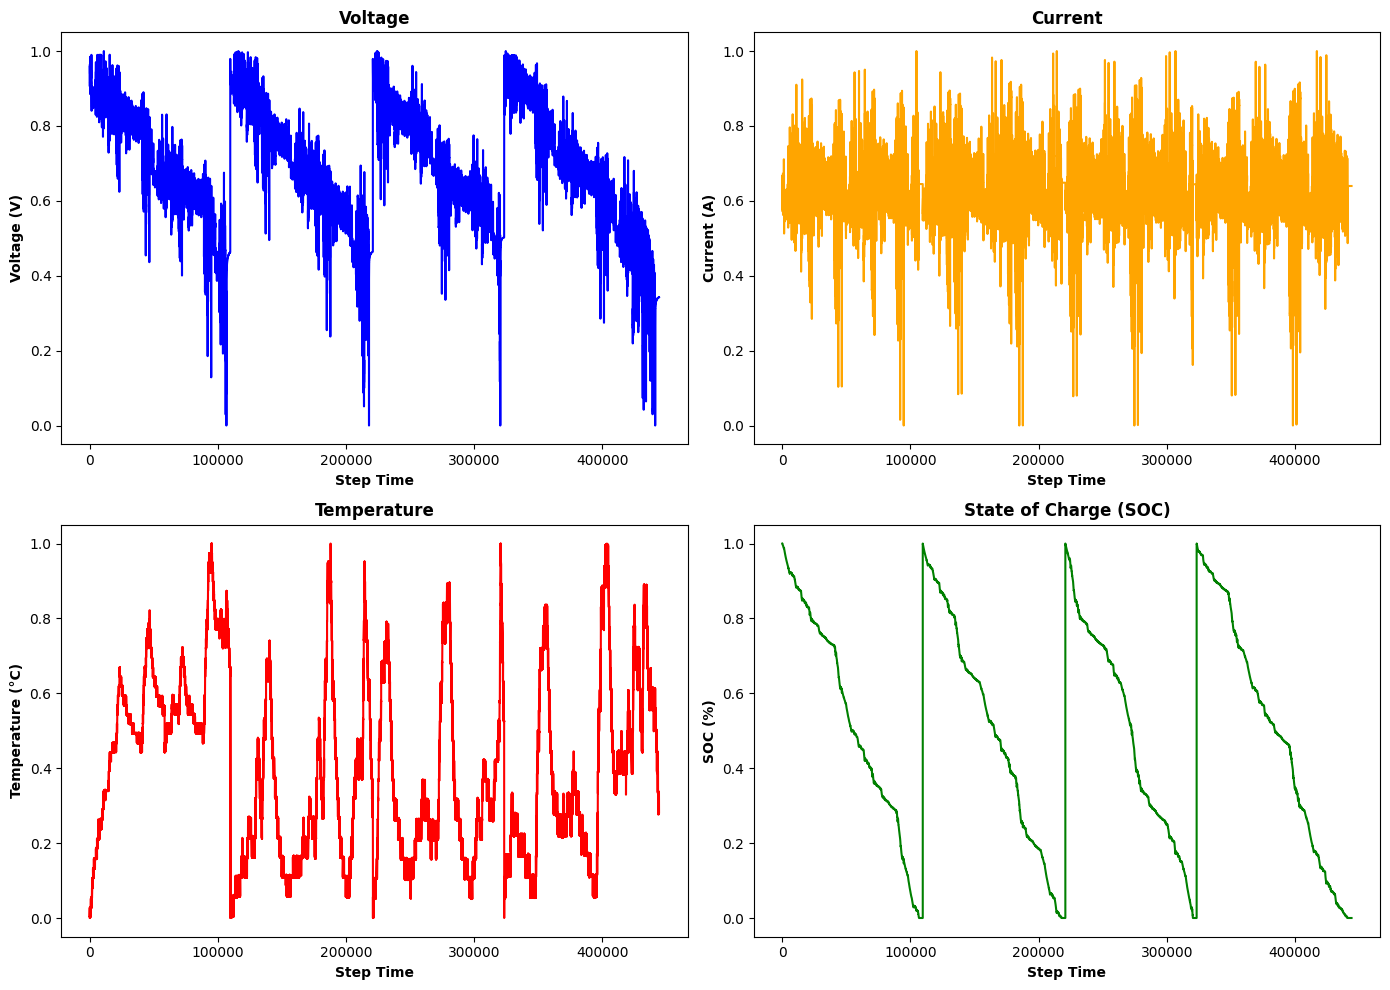

In [21]:
# Plot dataset yang telah digabungkan
plt.figure(figsize=(14, 10))

# Plot Voltage
plt.subplot(2, 2, 1)
plt.plot(combined_training_data.index, combined_training_data['Voltage'], color='blue')
plt.title('Voltage', fontweight='bold')
plt.xlabel('Step Time', fontweight='bold')
plt.ylabel('Voltage (V)', fontweight='bold')

# Plot Current
plt.subplot(2, 2, 2)
plt.plot(combined_training_data.index, combined_training_data['Current'], color='orange')
plt.title('Current', fontweight='bold')
plt.xlabel('Step Time', fontweight='bold')
plt.ylabel('Current (A)', fontweight='bold')

# Plot Temperature
plt.subplot(2, 2, 3)
plt.plot(combined_training_data.index, combined_training_data['Temperature'], color='red')
plt.title('Temperature', fontweight='bold')
plt.xlabel('Step Time', fontweight='bold')
plt.ylabel('Temperature (°C)', fontweight='bold')

# Plot SOC
plt.subplot(2, 2, 4)
plt.plot(combined_training_data.index, combined_training_data['SOC'], color='green')
plt.title('State of Charge (SOC)', fontweight='bold')
plt.xlabel('Step Time', fontweight='bold')
plt.ylabel('SOC (%)', fontweight='bold')

plt.tight_layout()
plt.show()


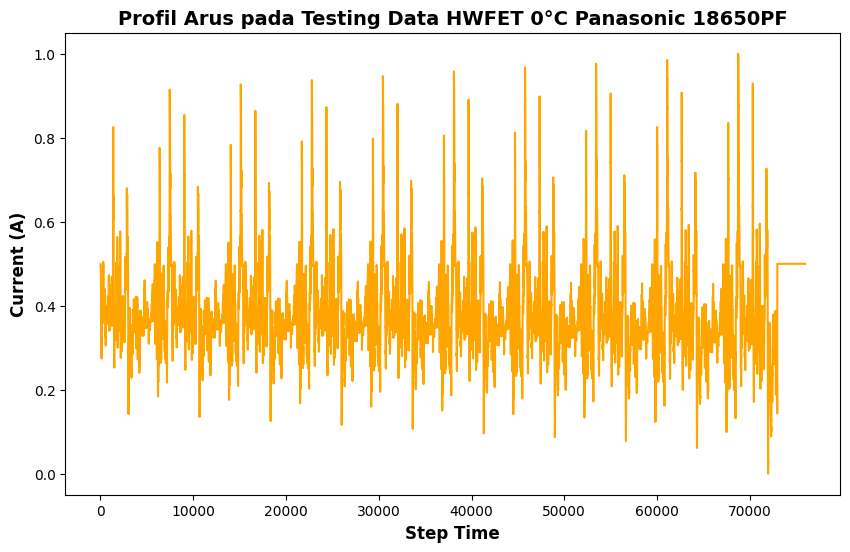

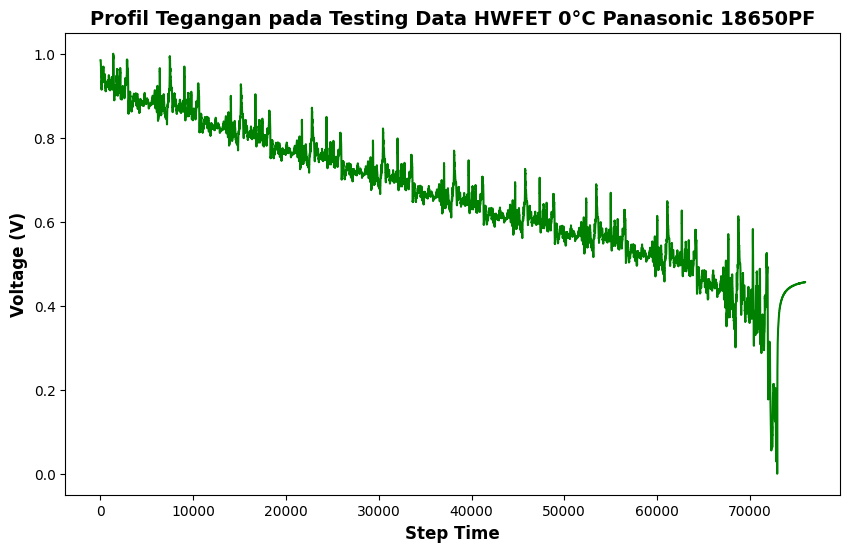

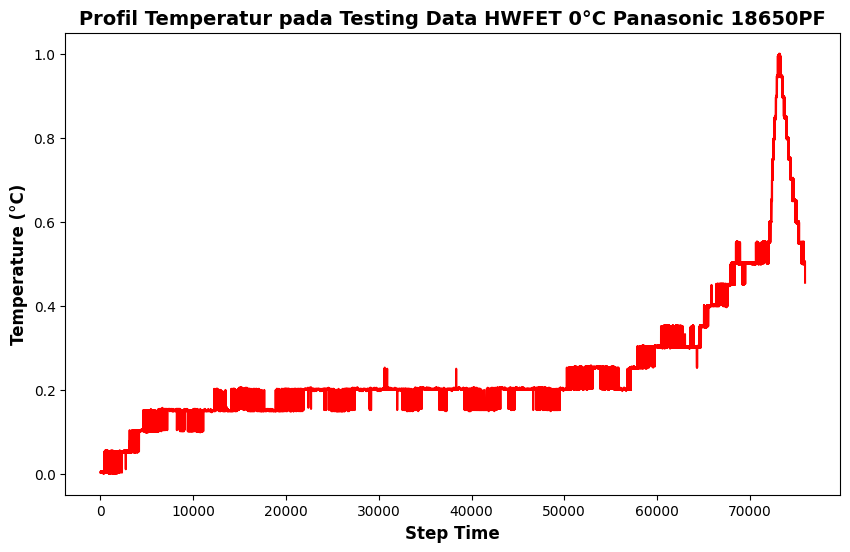

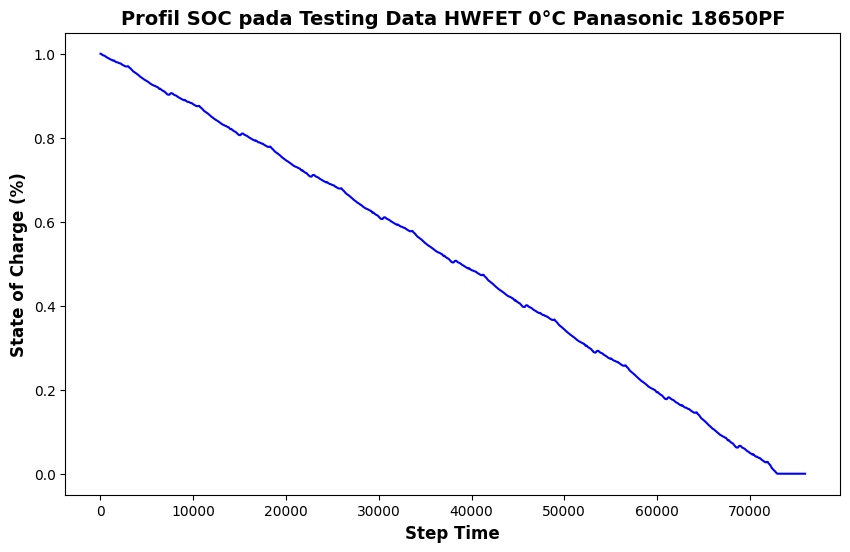

In [25]:
# Plot Current untuk testing
plt.figure(figsize=(10, 6))
plt.plot(df_testing_preprocessed['Step Time'], df_testing_preprocessed['Current'], color='orange')
plt.title('Profil Arus pada Testing Data HWFET 0°C Panasonic 18650PF', fontweight='bold', fontsize=14)
plt.xlabel('Step Time', fontweight='bold', fontsize=12)
plt.ylabel('Current (A)', fontweight='bold', fontsize=12)
plt.show()

# Plot Voltage untuk testing
plt.figure(figsize=(10, 6))
plt.plot(df_testing_preprocessed['Step Time'], df_testing_preprocessed['Voltage'], color='green')
plt.title('Profil Tegangan pada Testing Data HWFET 0°C Panasonic 18650PF', fontweight='bold', fontsize=14)
plt.xlabel('Step Time', fontweight='bold', fontsize=12)
plt.ylabel('Voltage (V)', fontweight='bold', fontsize=12)
plt.show()

# Plot Temperature untuk testing
plt.figure(figsize=(10, 6))
plt.plot(df_testing_preprocessed['Step Time'], df_testing_preprocessed['Temperature'], color='red')
plt.title('Profil Temperatur pada Testing Data HWFET 0°C Panasonic 18650PF', fontweight='bold', fontsize=14)
plt.xlabel('Step Time', fontweight='bold', fontsize=12)
plt.ylabel('Temperature (°C)', fontweight='bold', fontsize=12)
plt.show()

# Plot SOC untuk testing
plt.figure(figsize=(10, 6))
plt.plot(df_testing_preprocessed['Step Time'], df_testing_preprocessed['SOC'], color='blue')
plt.title('Profil SOC pada Testing Data HWFET 0°C Panasonic 18650PF', fontweight='bold', fontsize=14)
plt.xlabel('Step Time', fontweight='bold', fontsize=12)
plt.ylabel('State of Charge (%)', fontweight='bold', fontsize=12)
plt.show()

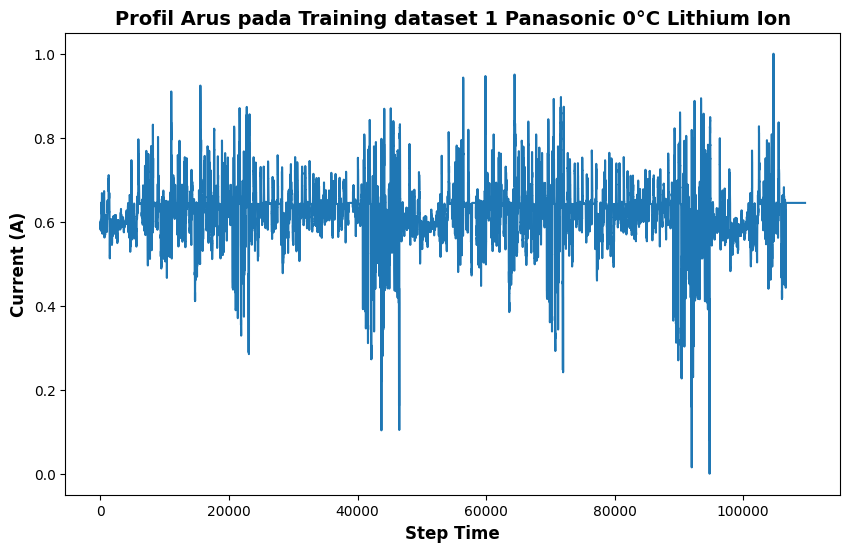

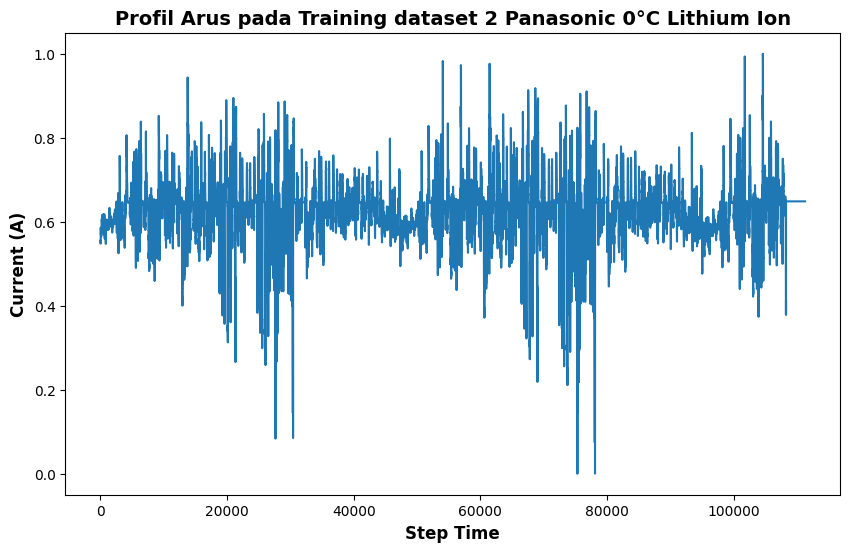

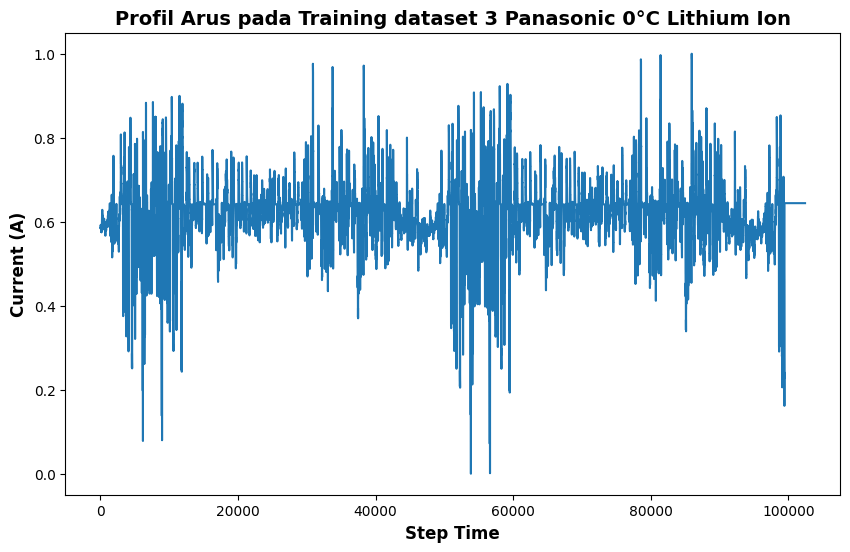

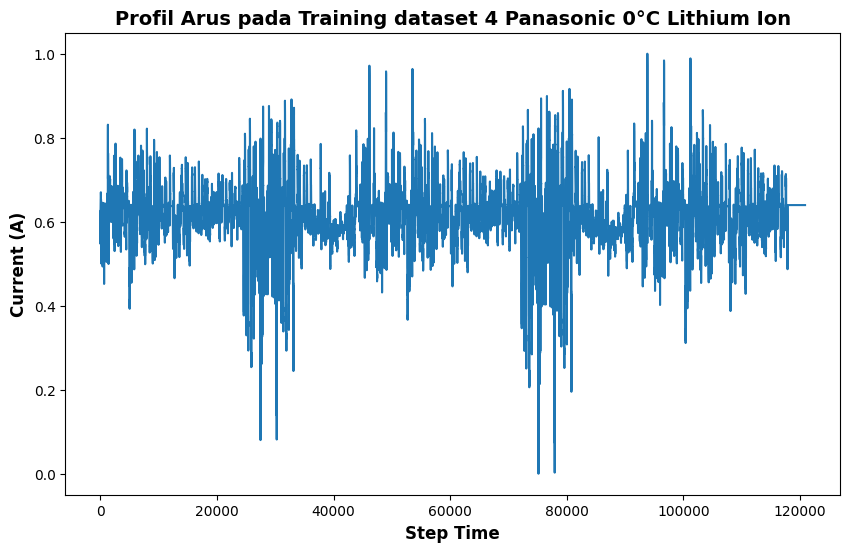

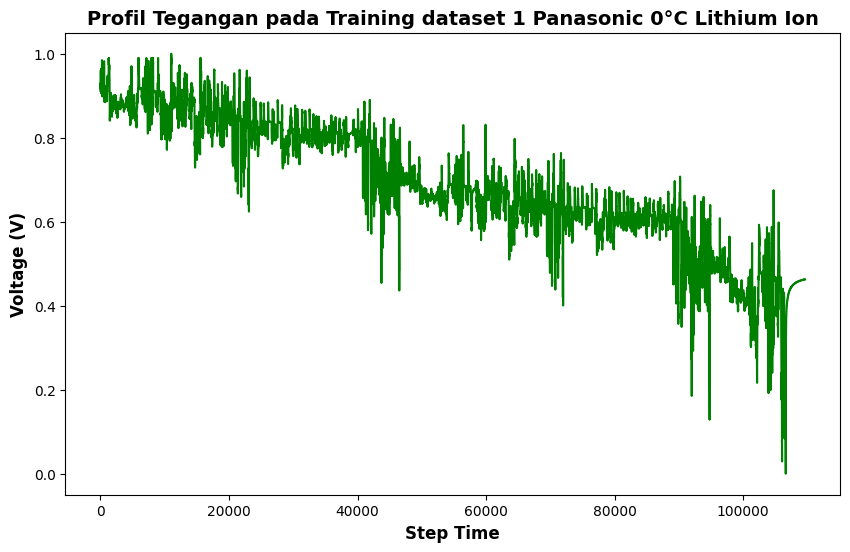

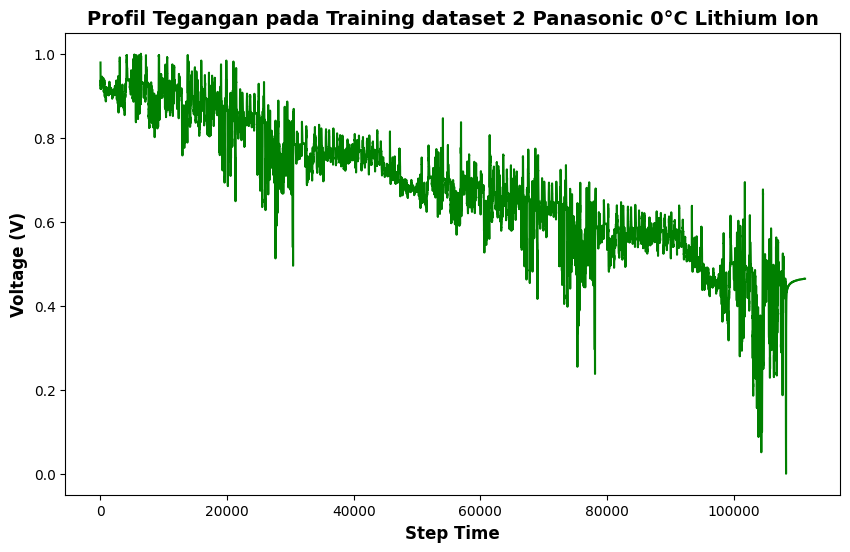

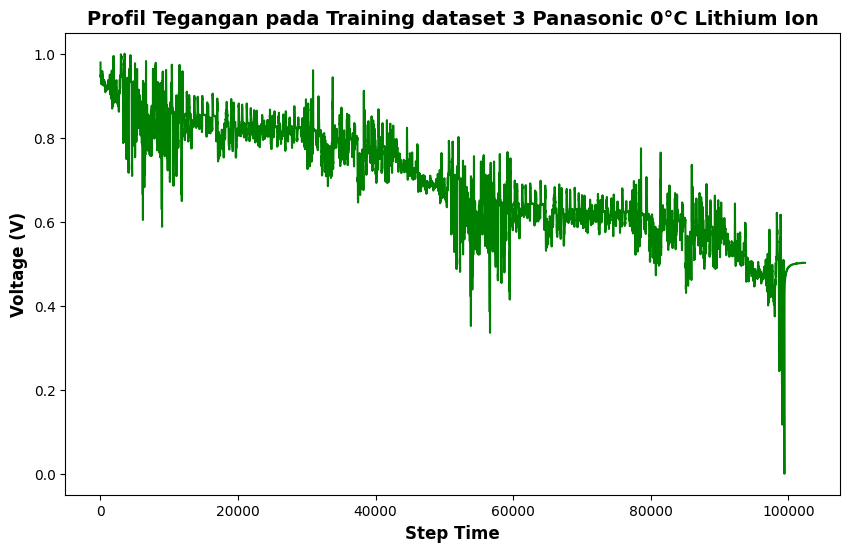

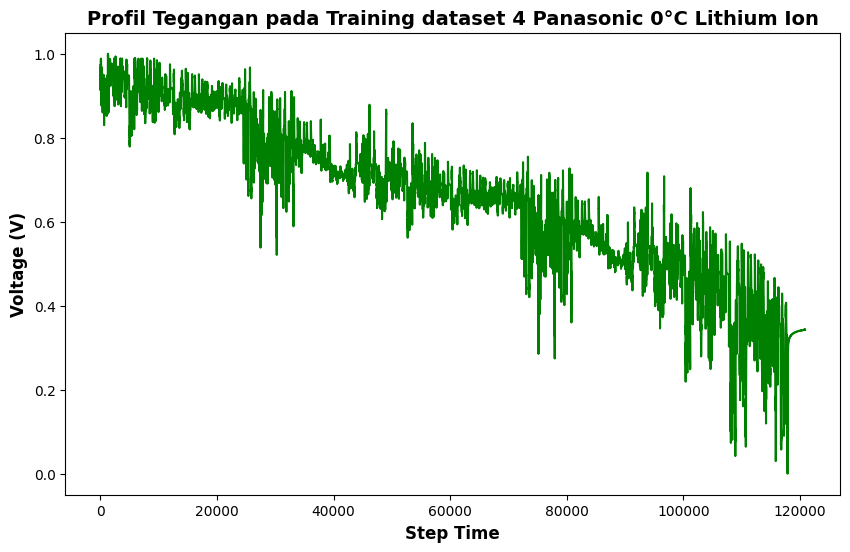

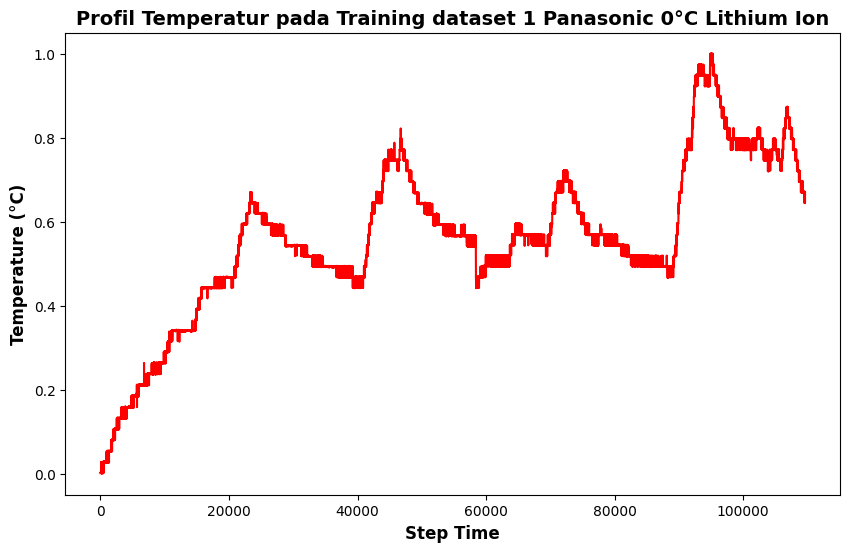

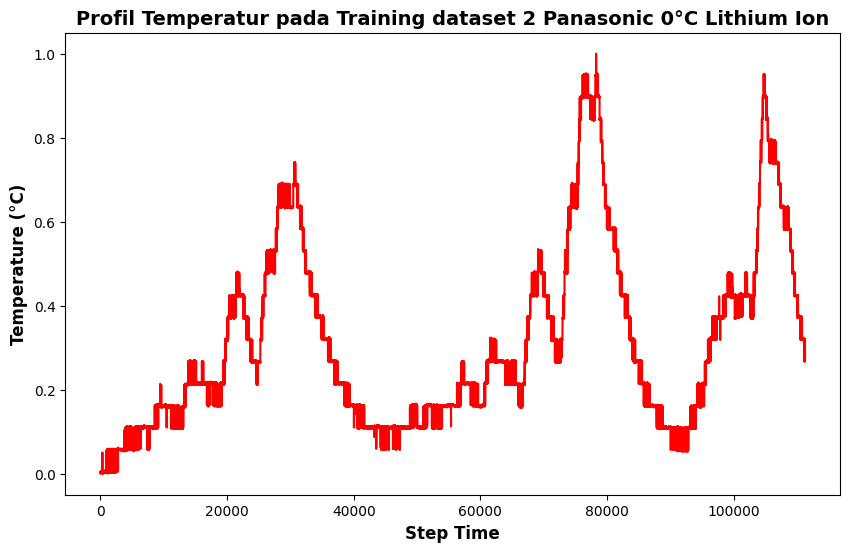

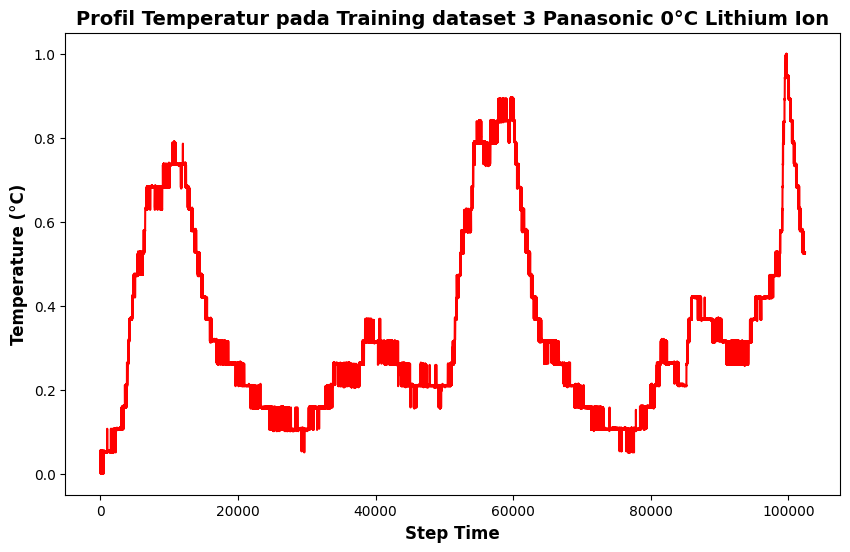

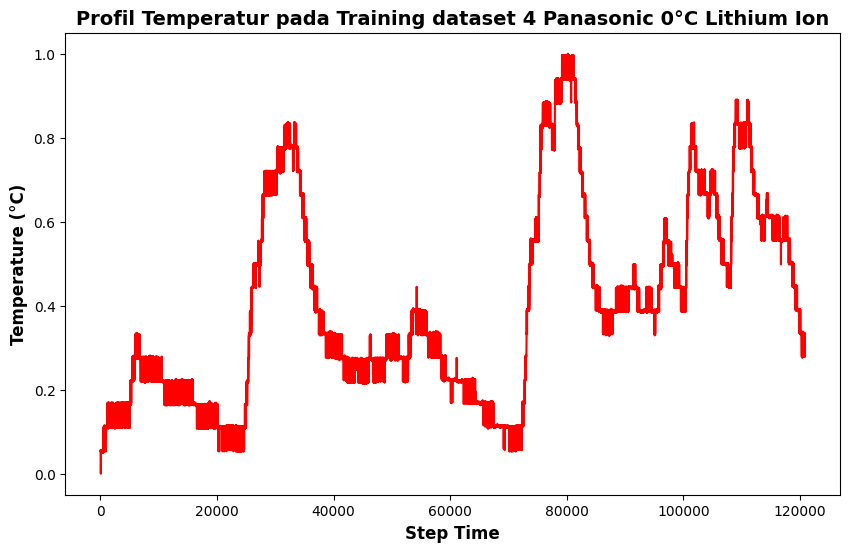

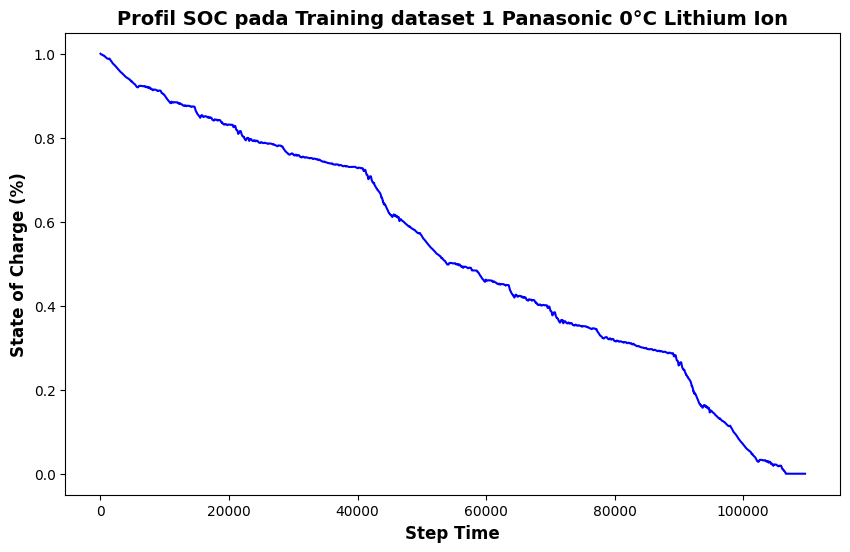

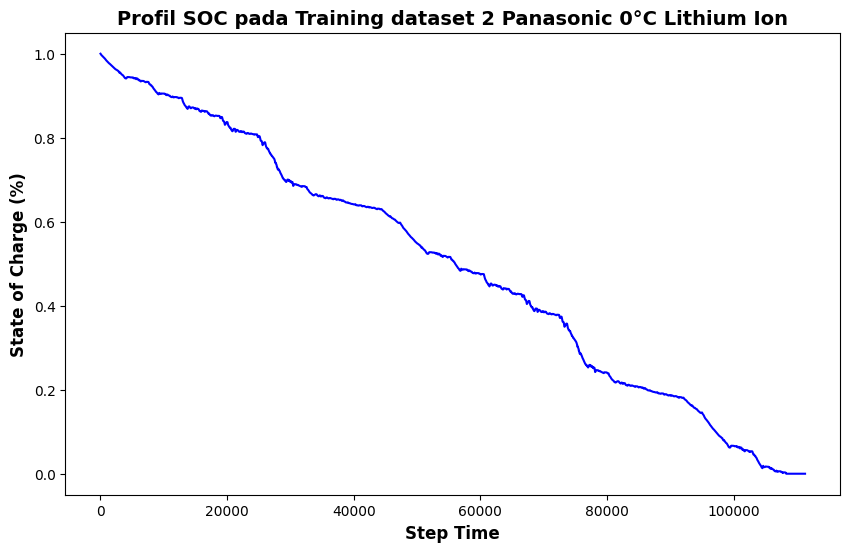

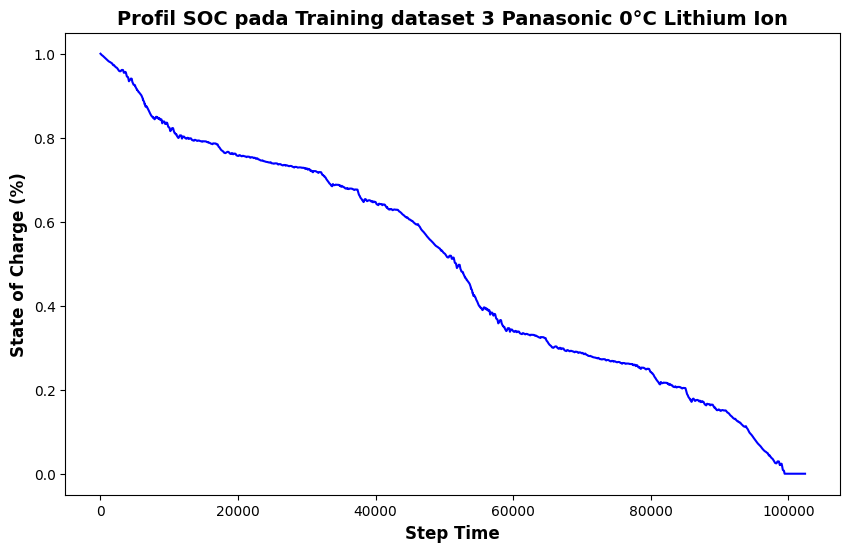

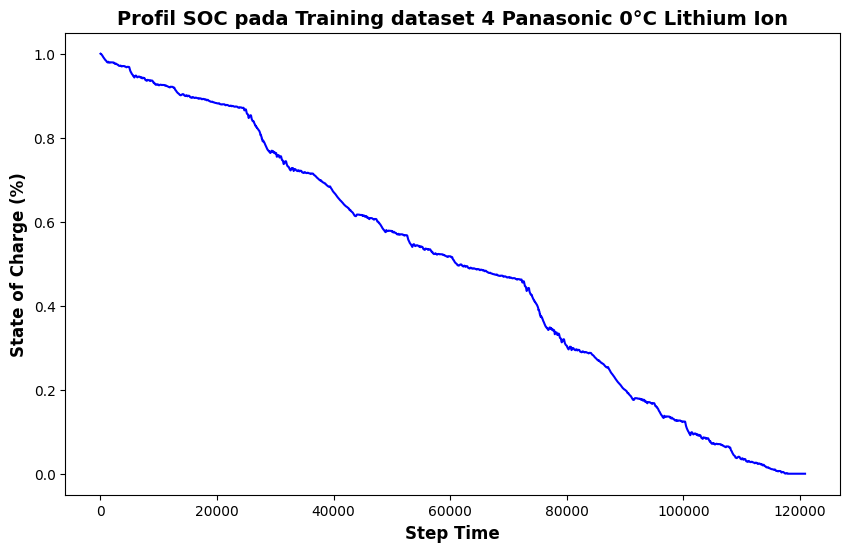

In [23]:
# Plot Current untuk training datasets
for i, df_training in enumerate(dfs_training_preprocessed):
    plt.figure(figsize=(10, 6))
    plt.plot(df_training['Step Time'], df_training['Current'])
    plt.title(f'Profil Arus pada Training dataset {i+1} Panasonic 0°C Lithium Ion', fontweight='bold', fontsize=14)
    plt.xlabel('Step Time', fontweight='bold', fontsize=12)
    plt.ylabel('Current (A)', fontweight='bold', fontsize=12)
    plt.show()

# Plot Voltage untuk training datasets
for i, df_training in enumerate(dfs_training_preprocessed):
    plt.figure(figsize=(10, 6))
    plt.plot(df_training['Step Time'], df_training['Voltage'], color='green')
    plt.title(f'Profil Tegangan pada Training dataset {i+1} Panasonic 0°C Lithium Ion', fontweight='bold', fontsize=14)
    plt.xlabel('Step Time', fontweight='bold', fontsize=12)
    plt.ylabel('Voltage (V)', fontweight='bold', fontsize=12)
    plt.show()

# Plot Temperature untuk training datasets
for i, df_training in enumerate(dfs_training_preprocessed):
    plt.figure(figsize=(10, 6))
    plt.plot(df_training['Step Time'], df_training['Temperature'], color='red')
    plt.title(f'Profil Temperatur pada Training dataset {i+1} Panasonic 0°C Lithium Ion', fontweight='bold', fontsize=14)
    plt.xlabel('Step Time', fontweight='bold', fontsize=12)
    plt.ylabel('Temperature (°C)', fontweight='bold', fontsize=12)
    plt.show()

# Plot SOC untuk training datasets
for i, df_training in enumerate(dfs_training_preprocessed):
    plt.figure(figsize=(10, 6))
    plt.plot(df_training['Step Time'], df_training['SOC'], color='blue')
    plt.title(f'Profil SOC pada Training dataset {i+1} Panasonic 0°C Lithium Ion', fontweight='bold', fontsize=14)
    plt.xlabel('Step Time', fontweight='bold', fontsize=12)
    plt.ylabel('State of Charge (%)', fontweight='bold', fontsize=12)
    plt.show()

In [2]:
# Load training data
training_data_path ='C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Data Training/25 C/Gabungan_Training_Data_25 C_Panasonic.csv'
training_data = pd.read_csv(training_data_path)

# Split features and target variable
X_train = training_data[['Voltage', 'Current', 'Temperature']]
y_train = training_data['SOC']

# Reshape input data to fit LSTM model requirements [samples, timesteps, features]
X_train = np.array(X_train).reshape((X_train.shape[0], 1, X_train.shape[1]))

In [3]:
# Load testing data
testing_data_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Data Training/25 C/Testing_HWFET.csv'
testing_data = pd.read_csv(testing_data_path)

# Split features and target variable
X_test = testing_data[['Voltage', 'Current', 'Temperature']]
y_test = testing_data['SOC']

# Reshape input data to fit LSTM model requirements [samples, timesteps, features]
X_test = np.array(X_test).reshape((X_test.shape[0], 1, X_test.shape[1]))

In [6]:
model = Sequential([
    LSTM(units=64, return_sequences=True, activation='tanh'),
    BatchNormalization(),
    LSTM(units=64, return_sequences=True, activation='tanh'),
    BatchNormalization(),
    LSTM(units=64, return_sequences=False, activation='tanh'), 
    BatchNormalization(), 
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mse')

early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

In [7]:
history = model.fit(X_train, y_train, epochs=500, 
                    batch_size=64, validation_split=0.2, 
                    callbacks=[early_stopping])

Epoch 1/500
5553/5553 ━━━━━━━━━━━━━━━━━━━━ 112s 17ms/step - loss: 0.0245 - val_loss: 0.0023
Epoch 2/500
5553/5553 ━━━━━━━━━━━━━━━━━━━━ 162s 29ms/step - loss: 0.0030 - val_loss: 0.0042
Epoch 3/500
5553/5553 ━━━━━━━━━━━━━━━━━━━━ 143s 26ms/step - loss: 0.0027 - val_loss: 0.0012
Epoch 4/500
5553/5553 ━━━━━━━━━━━━━━━━━━━━ 67s 12ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 5/500
5553/5553 ━━━━━━━━━━━━━━━━━━━━ 69s 12ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 6/500
5553/5553 ━━━━━━━━━━━━━━━━━━━━ 65s 12ms/step - loss: 0.0023 - val_loss: 0.0044
Epoch 7/500
5553/5553 ━━━━━━━━━━━━━━━━━━━━ 68s 12ms/step - loss: 0.0022 - val_loss: 0.0028
Epoch 8/500
5553/5553 ━━━━━━━━━━━━━━━━━━━━ 73s 13ms/step - loss: 0.0022 - val_loss: 0.0040
Epoch 9/500
5553/5553 ━━━━━━━━━━━━━━━━━━━━ 77s 14ms/step - loss: 0.0022 - val_loss: 0.0033
Epoch 10/500
5553/5553 ━━━━━━━━━━━━━━━━━━━━ 76s 14ms/step - loss: 0.0022 - val_loss: 0.0014
Epoch 11/500
5553/5553 ━━━━━━━━━━━━━━━━━━━━ 89s 15ms/step - loss: 0.0021 - val_loss: 0

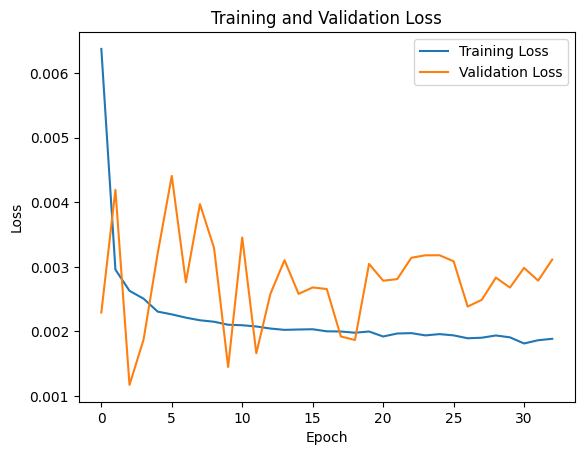

In [8]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 1, 64)          │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 1, 64)          │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 252,101 (984.77 KB)

 Trainable params: 83,905 (327.75 KB)

 Non-trainable params: 384 (1.50 KB)

 Optimizer params: 167,812 (655.52 KB)

In [12]:
def moving_average(data, window_size):
    cumsum = np.cumsum(data, dtype=float)
    cumsum[window_size:] = cumsum[window_size:] - cumsum[:-window_size]
    return cumsum[window_size - 1:] / window_size

2374/2374 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.0369
Testing Loss: 0.04746774211525917
2374/2374 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


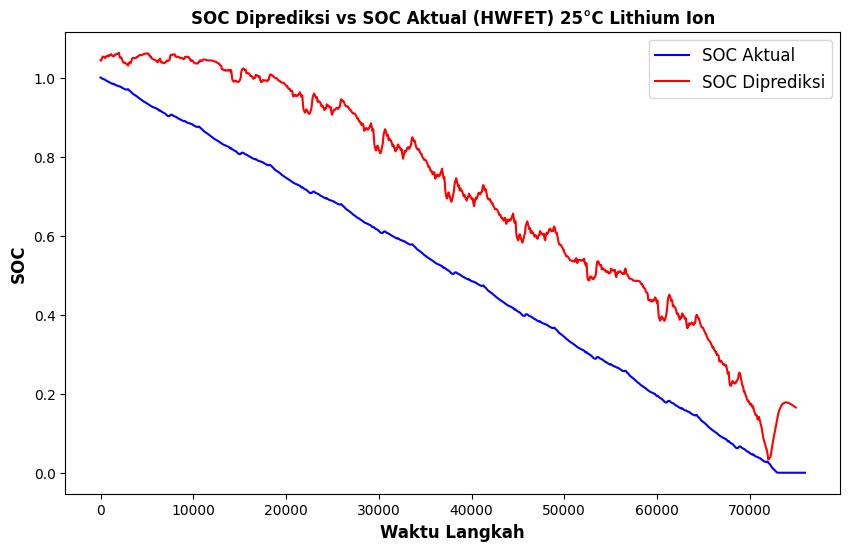

Metrik Evaluasi dalam Persen:
Mean Absolute Error (MAE): 42.4619%
Root Mean Squared Error (RMSE): 43.7957%
R-squared: 44.9213%


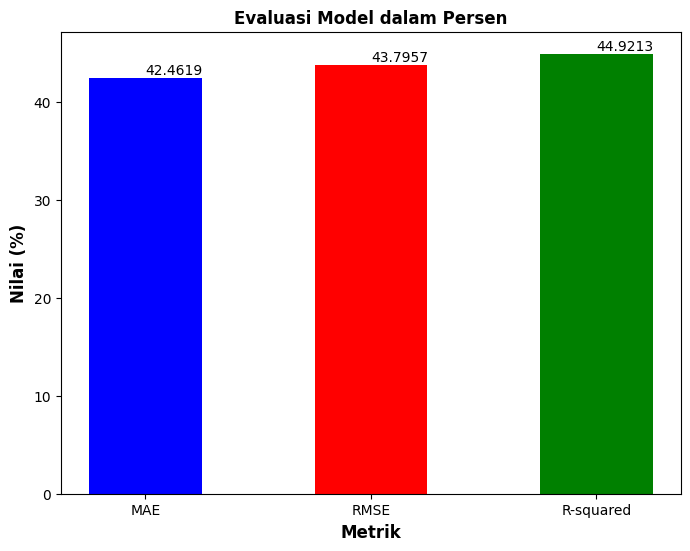

In [15]:
loss = model.evaluate(X_test, y_test)
print(f'Testing Loss: {loss}')

# Predict SOC using the model
y_pred = model.predict(X_test)

window_size = 500
y_pred_smoothed = moving_average(y_pred, window_size)

mae_smoothed = mean_absolute_error(y_test[window_size - 1:], y_pred_smoothed)
rmse_smoothed = mean_squared_error(y_test[window_size - 1:], y_pred_smoothed, squared=False)
r2_smoothed = r2_score(y_test[window_size - 1:], y_pred_smoothed)

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='SOC Aktual', color='blue', linestyle='-')
plt.plot(y_pred_smoothed, label='SOC Diprediksi', color='red', linestyle='-')
plt.title('SOC Diprediksi vs SOC Aktual (HWFET) 25°C Lithium Ion', fontweight='bold')
plt.xlabel('Waktu Langkah', fontsize=12, fontweight='bold')
plt.ylabel('SOC', fontsize=12, fontweight='bold')
plt.legend(prop={'size': 12})
plt.show()

mae_percent = (mae_smoothed / y_test.mean()) * 100
rmse_percent = (rmse_smoothed / y_test.mean()) * 100
r2_percent = r2_smoothed * 100  

print("Metrik Evaluasi dalam Persen:")
print(f"Mean Absolute Error (MAE): {mae_percent:.4f}%")
print(f"Root Mean Squared Error (RMSE): {rmse_percent:.4f}%")
print(f"R-squared: {r2_percent:.4f}%")

plt.figure(figsize=(8, 6))  
bars = plt.bar(['MAE', 'RMSE', 'R-squared'], [mae_percent, rmse_percent, r2_percent], color=['blue', 'red', 'green'], width=0.5)
plt.title('Evaluasi Model dalam Persen', fontweight='bold')
plt.xlabel('Metrik', fontsize=12, fontweight='bold')
plt.ylabel('Nilai (%)', fontsize=12, fontweight='bold')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', va='bottom')

plt.show()

In [ ]:
# Simpan Model
model_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Model/lstm_0 C_modelpakebatch_Panasonic.h5'
model.save(model_path)
print(f"Model saved successfully at '{model_path}'")

# Simpan Riwayat Pelatihan
history_path = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Model/training_historypakebatch_lstm_0 C_Panasonic.csv'
pd.DataFrame(history.history).to_csv(history_path, index=False)
print(f"Training history saved successfully at '{history_path}'")

In [ ]:
model_jalur= 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Model/lstm_0 C_model2_Panasonic.h5'
history_jalur = 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Model/training_history2_lstm_0 C_Panasonic.csv'

# Metode untuk memuat model dan riwayat pelatihan
def load_model_and_history(model_jalur, history_jalur):
    # Memuat model
    loaded_model = tf.keras.models.load_model(model_jalur)
    
    # Memuat riwayat pelatihan
    loaded_history = pd.read_csv(history_jalur)
    
    return loaded_model, loaded_history

# Memuat kembali model dan riwayat pelatihan
loaded_model, loaded_history = load_model_and_history(model_jalur, history_jalur)

In [ ]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.title('Grafik Hasil Training Model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Load model
model_path= 'C:/Users/Acer/Documents/Bismillah Skripsi/Kodingan Untuk Skripsi/Panasonic lithium ion/Model/lstm_0 C_model2_Panasonic.h5'
loaded_model = load_model(model_path, custom_objects={'mse': tf.keras.losses.mean_squared_error})

# Evaluasi model dengan testing data
loss = loaded_model.evaluate(X_test, y_test)
print(f'Testing Loss: {loss}')

# Predict SOC using the model
y_pred = loaded_model.predict(X_test)

# Calculate MAE and RMSE for testing data with the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot actual vs predicted SOC
plt.figure(figsize=(12, 8))
plt.plot(y_test, label='Actual SOC', color='blue', linestyle='-')
plt.plot(y_pred, label='Predicted SOC', color='red', linestyle='--')
plt.title('Predicted SOC vs Actual SOC (HWFET) at 10°C for Panasonic Lithium Ion', fontsize=16)
plt.xlabel('Step Time', fontsize=14)
plt.ylabel('SOC', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()